# Persiapan Dataset

Dataset yang digunakan merupakan dataset sintetis yang berisi data penjualan kopi selama 2 tahun (1 Januari 2023 - 31 Desember 2024) di Arab Saudi. Data ini mencakup rincian tentang kuantitas, harga, diskon, dan total penjualan, sehingga ideal untuk menganalisis tren pembelian, dampak harga, dan perilaku pasar.

In [60]:
import pandas as pd
import numpy as np

In [61]:
# Load Dataset
dataset = pd.read_csv('DatasetForCoffeeSales2.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas')
print(dataset.head())

Ukuran dataset: 730 baris dan 11 kolom

Lima data teratas
       Date  Customer_ID    City      Category     Product  Unit Price  \
0  1/1/2023           32  Riyadh  coffee beans   Colombian          40   
1  1/2/2023           49    Abha  coffee beans  Costa Rica          35   
2  1/3/2023           75   Tabuk  coffee beans  Costa Rica          35   
3  1/4/2023           80    Abha  coffee beans   Ethiopian          45   
4  1/5/2023           78    Hail  coffee beans   Colombian          40   

   Quantity  Sales Amount  Used_Discount  Discount_Amount  Final Sales  
0        14           560          False                0          560  
1        17           595          False                0          595  
2        19           665          False                0          665  
3         1            45          False                0           45  
4        46          1840           True              368         1472  


## *Preprocessing Data*
Sebelum melakukan visualisasi, perlu dilakukan preprocessing dulu agar datanya lebih rapi dan siap dianalisis. Berikut langkah-langkah preprocessing yang bisa dilakukan:

In [62]:
# Cek missing value
np.sum(dataset.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Date,0
Customer_ID,0
City,0
Category,0
Product,0
Unit Price,0
Quantity,0
Sales Amount,0
Used_Discount,0
Discount_Amount,0


Berdasarkan *output summarize* tersebut, diperoleh bahwa tidak ada kolom yang mengandung *Missing Value*.

In [63]:
# Konversi tipe data df['Date'] ke datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], format = '%m/%d/%Y')

Dari tampilan dataset, kolom Date sudah dalam format M/D/YYYY (misal: 1/1/2023). Namun, dalam pandas, format tanggal sering terbaca sebagai string saat membaca file CSV. Makanya tetap perlu dikonversi ke tipe datetime agar bisa digunakan untuk analisis berbasis waktu.

In [64]:
# Cek duplikasi data
duplicates = dataset.duplicated().sum()
print(f'Jumlah duplikasi data: {duplicates}')
if duplicates > 0 :
  dataset = dataset.drop_duplicates()

Jumlah duplikasi data: 0


Berdasarkan *output* tersebut, menunjukkan tidak ada duplikasi data.

In [ ]:
# Menambahkan fitur baru: bulan dan tahun
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
print(dataset.head)

<bound method NDFrame.head of           Date  Customer_ID    City      Category     Product  Unit Price  \
0   2023-01-01           32  Riyadh  coffee beans   Colombian          40   
1   2023-01-02           49    Abha  coffee beans  Costa Rica          35   
2   2023-01-03           75   Tabuk  coffee beans  Costa Rica          35   
3   2023-01-04           80    Abha  coffee beans   Ethiopian          45   
4   2023-01-05           78    Hail  coffee beans   Colombian          40   
..         ...          ...     ...           ...         ...         ...   
725 2024-12-26            4    Hail  coffee beans   Colombian          40   
726 2024-12-27           63   Mecca  coffee beans   Colombian          40   
727 2024-12-28           39    Abha  coffee beans  Costa Rica          35   
728 2024-12-29           57   Tabuk  coffee beans   Ethiopian          45   
729 2024-12-30           50  Medina  coffee beans   Brazilian          30   

     Quantity  Sales Amount  Used_Discount  D

Menambahkan fitur bulan dan tahun saat preprocessing membantu dalam analisis tren waktu, agregasi data, serta pembuatan visualisasi seperti *line chart* tren bulanan atau tahunan. Dengan fitur ini, data dapat dikelompokkan lebih mudah untuk menghitung total penjualan per bulan atau tahun, serta memudahkan *filtering* dan *grouping* tanpa harus memproses ulang kolom tanggal. Selain itu, fitur ini juga bermanfaat dalam pembuatan model prediktif untuk analisis tren penjualan di masa depan.

In [ ]:
# Menambahkan kolom total diskon (%)
dataset['Discount_Percentage'] = (dataset['Discount_Amount'] / dataset['Sales Amount']) * 100
print(dataset.head)

<bound method NDFrame.head of           Date  Customer_ID    City      Category     Product  Unit Price  \
0   2023-01-01           32  Riyadh  coffee beans   Colombian          40   
1   2023-01-02           49    Abha  coffee beans  Costa Rica          35   
2   2023-01-03           75   Tabuk  coffee beans  Costa Rica          35   
3   2023-01-04           80    Abha  coffee beans   Ethiopian          45   
4   2023-01-05           78    Hail  coffee beans   Colombian          40   
..         ...          ...     ...           ...         ...         ...   
725 2024-12-26            4    Hail  coffee beans   Colombian          40   
726 2024-12-27           63   Mecca  coffee beans   Colombian          40   
727 2024-12-28           39    Abha  coffee beans  Costa Rica          35   
728 2024-12-29           57   Tabuk  coffee beans   Ethiopian          45   
729 2024-12-30           50  Medina  coffee beans   Brazilian          30   

     Quantity  Sales Amount  Used_Discount  D

Menambahkan kolom total diskon (%) saat *preprocessing* mempermudah analisis pengaruh diskon terhadap penjualan, memungkinkan visualisasi seperti *scatter plot* antara diskon dan jumlah unit terjual, serta membantu dalam segmentasi pelanggan berdasarkan respon terhadap diskon. Selain itu, fitur ini juga berguna untuk evaluasi strategi promosi dan optimasi harga guna meningkatkan *revenue*.

In [ ]:
# Menyimpan hasil preprocessing ke file baru
dataset.to_csv('/content/drive/MyDrive/cleaned_coffe_sales.csv', index=False)
print("Preprocessing selesai! Data telah disimpan.")

Preprocessing selesai! Data telah disimpan.


# Visualisasi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load dataset yang sudah bersih
file_path = ('/content/drive/MyDrive/cleaned_coffe_sales.csv')
df = pd.read_csv(file_path)

In [27]:
# Memastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

## Analisis Tren Penjualan

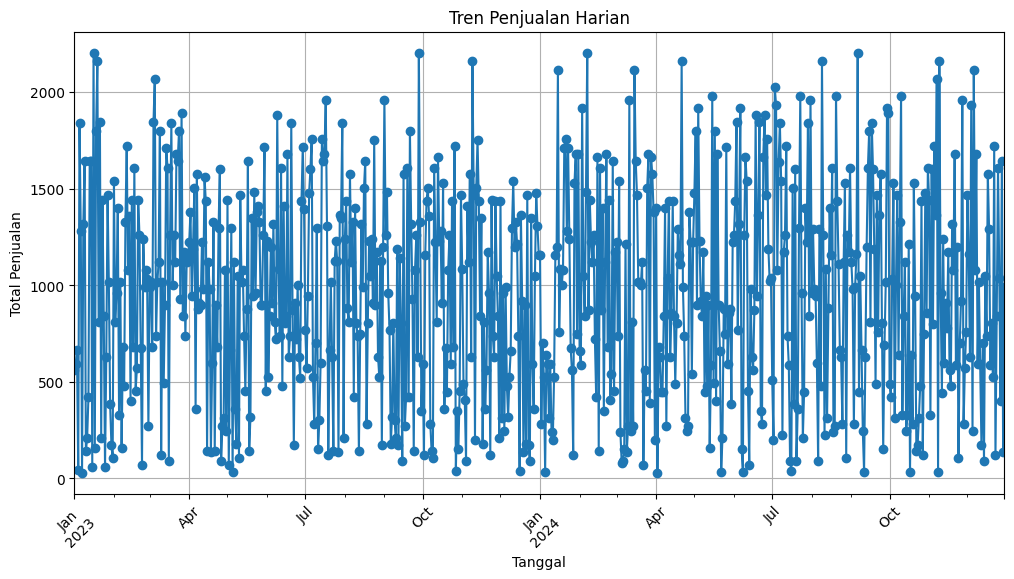

In [29]:
# Line Chart - Tren Penjualan Harian
plt.figure(figsize=(12, 6))
df.groupby('Date')['Sales Amount'].sum().plot(marker='o', linestyle='-')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi tren penjualan harian, terlihat bahwa total penjualan berfluktuasi dari waktu ke waktu dengan beberapa puncak yang mencerminkan lonjakan permintaan pada hari-hari tertentu. Grafik tersebut menunjukkan pola yang tidak sepenuhnya stabil, mengindikasikan adanya faktor musiman atau promosi yang mempengaruhi lonjakan penjualan.

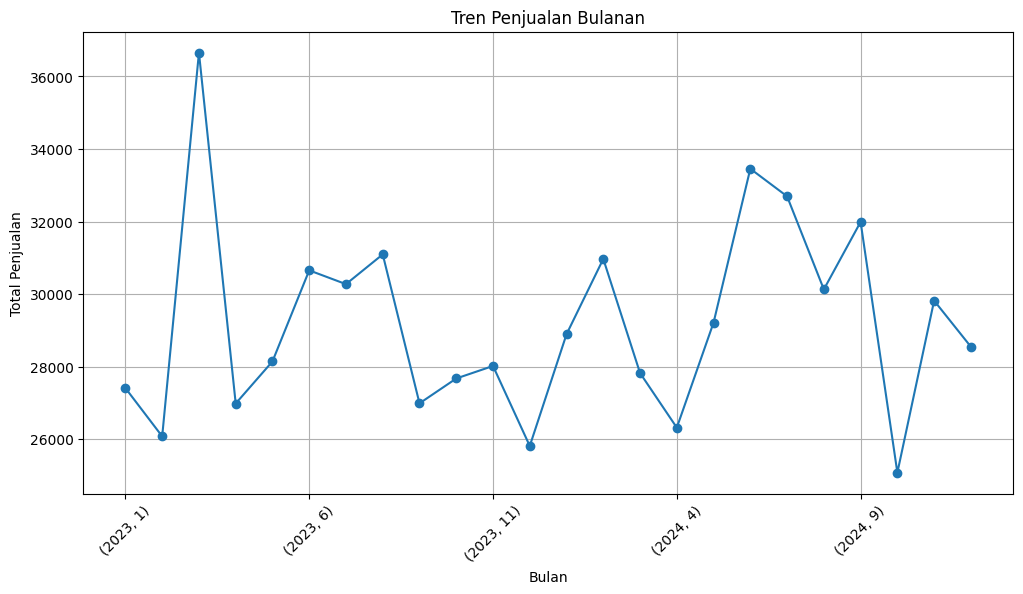

In [40]:
# Line Chart - Tren Penjualan Bulanan
plt.figure(figsize=(12, 6))
df.groupby(['Year', 'Month'])['Sales Amount'].sum().plot(marker='o', linestyle='-')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Pada visualisasi tren penjualan bulanan, tampak bahwa ada fluktuasi dari bulan ke bulan dengan beberapa bulan tertentu memiliki lonjakan yang signifikan, yang bisa disebabkan oleh event khusus atau strategi pemasaran tertentu.

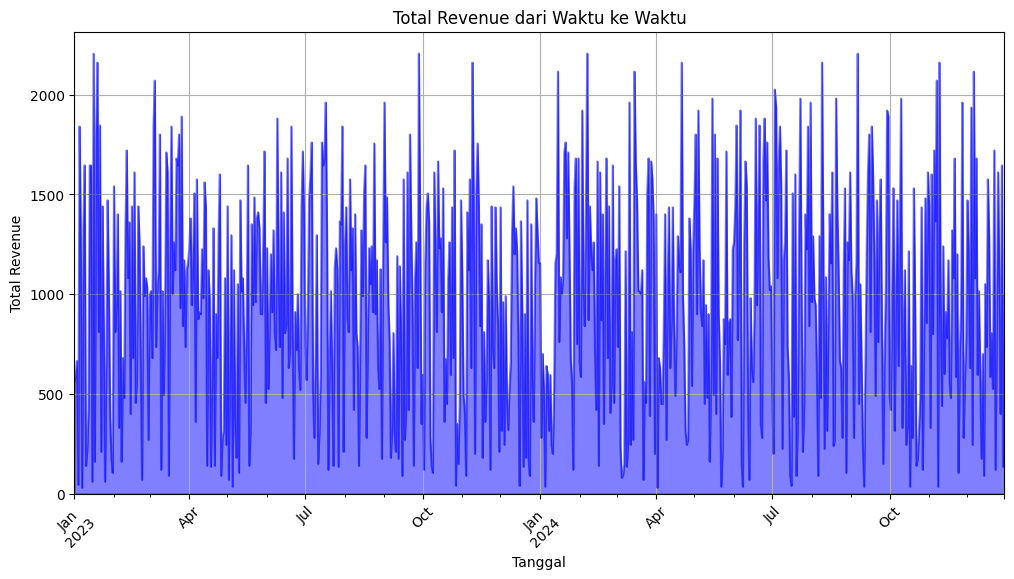

In [59]:
# Area Plot - Total Revenue dari Waktu ke Waktu
plt.figure(figsize=(12, 6))
df.groupby('Date')['Sales Amount'].sum().plot(kind='area', alpha=0.5, color='blue')
plt.title('Total Revenue dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Area plot total revenue dari waktu ke waktu menunjukkan pola yang serupa dengan tren penjualan harian, di mana terjadi lonjakan yang mungkin berkaitan dengan hari-hari tertentu yang memiliki tingkat pembelian tinggi. Secara keseluruhan, analisis ini memberikan wawasan penting terkait pola penjualan dan revenue, yang dapat digunakan untuk merancang strategi bisnis yang lebih efektif.

## Segmentasi Pasar

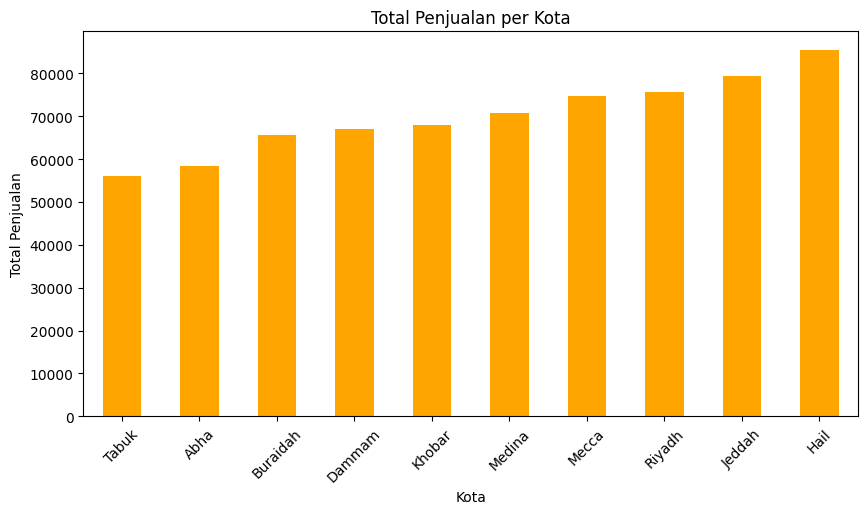

In [38]:
# Bar Chart - Total Penjualan per Kota
plt.figure(figsize=(10, 5))
df.groupby('City')['Sales Amount'].sum().sort_values().plot(kind='bar', color='orange')
plt.title('Total Penjualan per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

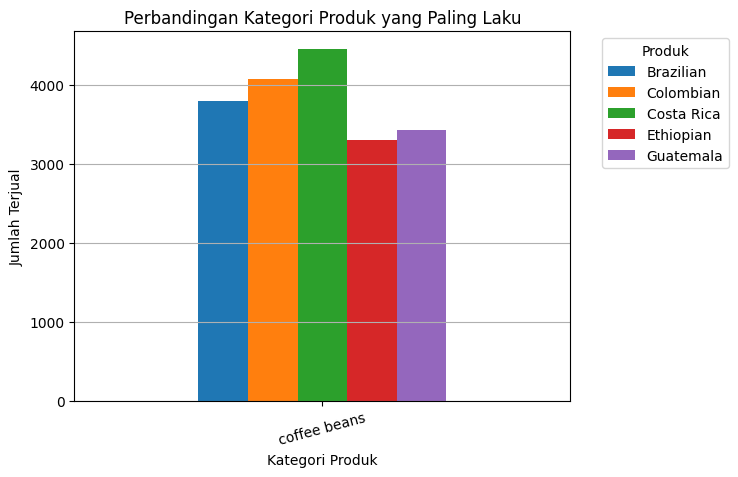

In [52]:
# Multi-Bar Chart - Perbandingan Kategori Produk Terlaris
plt.figure(figsize=(12, 6))
df.groupby(['Category', 'Product'])['Quantity'].sum().unstack().plot(kind='bar', stacked=False)
plt.title('Perbandingan Kategori Produk yang Paling Laku')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Terjual')
plt.legend(title='Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

Dari analisis segmentasi pasar berdasarkan kota dan kategori produk, terlihat bahwa Hail merupakan kota dengan total penjualan tertinggi, diikuti oleh Jeddah dan Riyadh. Hal tersebut menunjukkan bahwa permintaan produk di kota-kota besar cenderung lebih tinggi, kemungkinan karena populasi yang lebih besar dan daya beli yang lebih kuat. Sementara itu, dari kategori produk, kopi Costa Rica menjadi yang paling laku, diikuti oleh Colombian dan Brazilian, yang menandakan bahwa preferensi pelanggan lebih condong ke kopi dengan cita rasa tertentu. Ethiopian dan Guatemala memiliki jumlah penjualan yang lebih rendah, yang bisa menjadi indikasi bahwa mereka adalah segmen pasar yang lebih niche atau memiliki target pasar yang lebih spesifik. Kombinasi antara data ini dapat digunakan untuk strategi pemasaran yang lebih tepat sasaran, seperti meningkatkan stok di kota dengan permintaan tinggi atau menyesuaikan promosi berdasarkan preferensi pelanggan di masing-masing daerah.

## Pengaruh Diskon terhadap Penjualan

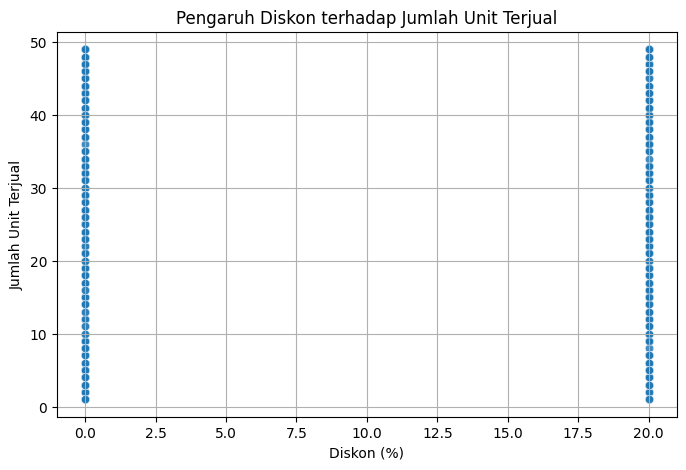

In [39]:
# Scatter Plot - Hubungan Diskon dan Jumlah Unit Terjual
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount_Percentage', y='Quantity', alpha=0.6)
plt.title('Pengaruh Diskon terhadap Jumlah Unit Terjual')
plt.xlabel('Diskon (%)')
plt.ylabel('Jumlah Unit Terjual')
plt.grid(True)
plt.show()

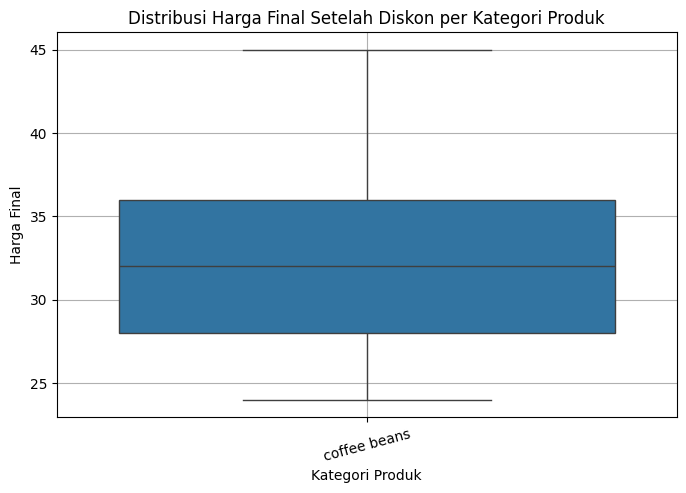

In [55]:
# Box Plot - Distribusi Harga Final Setelah Diskon
plt.figure(figsize=(8, 5))
df['Final_Price'] = df['Unit Price'] * (1 - df['Discount_Percentage'] / 100)
sns.boxplot(data=df, x='Category', y='Final_Price')
plt.title('Distribusi Harga Final Setelah Diskon per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Final')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

* Kota dengan penjualan tertinggi seperti Hail, Jeddah, dan Riyadh sebaiknya menjadi prioritas dalam strategi pemasaran dan distribusi.
* Costa Rica, Colombian, dan Brazilian coffee beans lebih disukai pelanggan, sehingga promosi bisa difokuskan pada varian ini.
* Diskon 20% tidak efektif dalam meningkatkan penjualan, sehingga bisa dievaluasi dengan strategi lain seperti diskon bertingkat, bundling, atau program loyalitas.
* Harga akhir setelah diskon masih cukup tinggi, kemungkinan pelanggan lebih mempertimbangkan faktor lain selain harga, seperti kualitas atau brand loyalty.

## Analisis Performa Produk

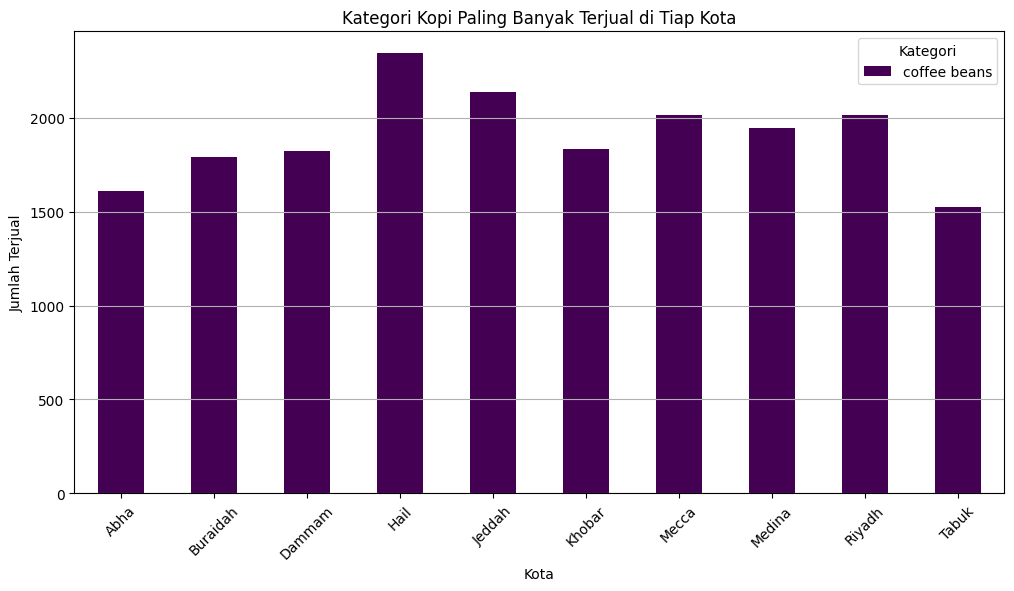

In [58]:
# Stacked Chart - Penjualan Kategori Kopi per Kota
df_pivot = df.pivot_table(index='City', columns='Category', values='Quantity', aggfunc='sum', fill_value=0)
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Kategori Kopi Paling Banyak Terjual di Tiap Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Terjual')
plt.legend(title='Kategori')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Dari grafik, terlihat bahwa kategori kopi dengan jumlah penjualan tertinggi terdapat di kota Hail, diikuti oleh Jeddah, Mecca, dan Riyadh. Sebaliknya, kota dengan jumlah penjualan terendah adalah Tabuk dan Abha.

* Implikasi Bisnis: Kota dengan penjualan tinggi menunjukkan potensi pasar yang besar, sehingga dapat dijadikan fokus utama dalam strategi pemasaran dan distribusi. Sebaliknya, kota dengan penjualan rendah bisa dievaluasi untuk melihat apakah ada hambatan seperti preferensi pasar atau kurangnya strategi pemasaran yang efektif.

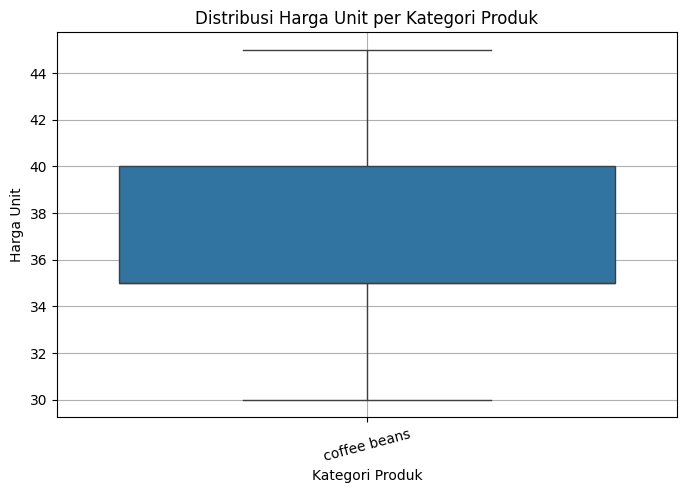

In [65]:
# Box Plot - Distribusi Harga Unit per Kategori Produk
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Category', y='Unit Price')
plt.title('Distribusi Harga Unit per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Unit')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

Distribusi harga unit untuk kategori produk (coffee beans) menunjukkan rentang harga antara sekitar 30 hingga 45 dengan median harga di sekitar 36–38.

* Implikasi Bisnis: Rentang harga yang cukup luas ini menunjukkan adanya variasi harga dalam kategori yang sama, kemungkinan karena perbedaan kualitas atau ukuran produk. Jika mayoritas harga berada di kisaran 35–40, maka strategi harga yang kompetitif bisa difokuskan pada rentang tersebut agar tetap sesuai dengan ekspektasi pasar.


**Kesimpulan & Rekomendasi**
* Kota dengan penjualan tinggi seperti Hail, Jeddah, Mecca, dan Riyadh perlu mendapatkan perhatian lebih dalam promosi dan ketersediaan stok.
* Kota dengan penjualan rendah seperti Tabuk dan Abha dapat dilakukan evaluasi lebih lanjut untuk memahami faktor penyebab rendahnya permintaan.
* Rentang harga produk perlu diperhatikan untuk memastikan harga yang sesuai dengan daya beli pelanggan di berbagai kota.